In [222]:
import numpy as np

import scipy.signal

import matplotlib.pyplot as plt

import librosa

import librosa.display


In [223]:
import os
from os import listdir
from os.path import isfile, join

data_dir = '/home/scpark/hard/datasets/LJSpeech-1.1/wavs'

# 해당 디렉토리에 있는 파일 중 이름에 wav가 들어가 있는 모든 파일의 경로를 리스트에 담는다.
data_files = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f)) if 'wav' in f]
data_files.sort()

print('wave files : ', len(data_files))
print(data_files[0])


wave files :  13100
/home/scpark/hard/datasets/LJSpeech-1.1/wavs/LJ001-0001.wav


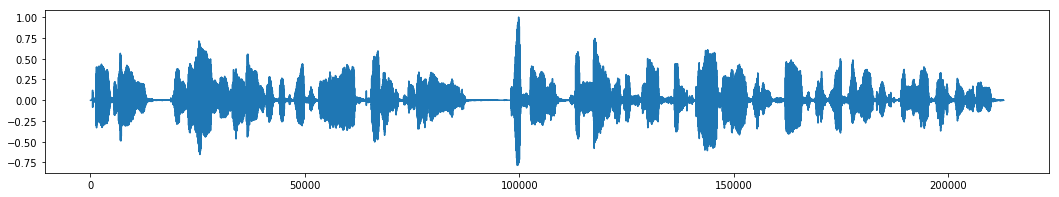

(1025, 416)


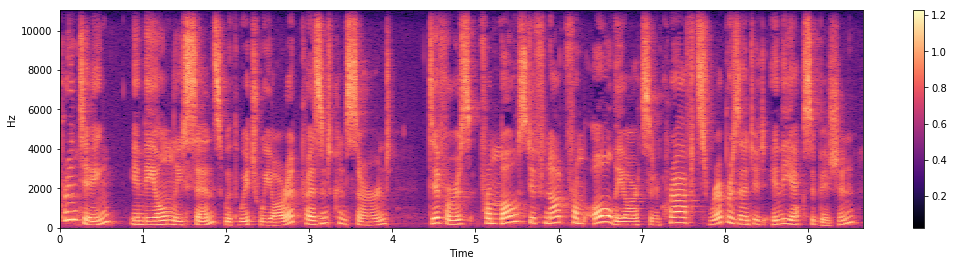

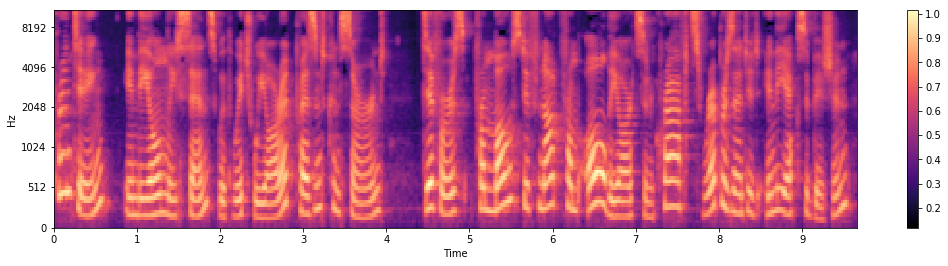

In [275]:
wav, _ = librosa.core.load(data_files[0])
wav /= max(abs(wav))

plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.show()

def normalize(S):
    return (20 * np.log10(S + 1e-5) + 100) / 120

spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
spec = np.abs(spec)
mel_matrix = librosa.filters.mel(sr=22050, n_fft=2048, fmin=0.0, fmax=8000, n_mels=80)
mel = mel_matrix @ spec 

plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(spec), y_axis='linear', x_axis='time')
plt.colorbar()
plt.show()

plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(mel), y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()

# wav 들어보기
import IPython.display as ipd
ipd.Audio(wav, rate=22050)


256


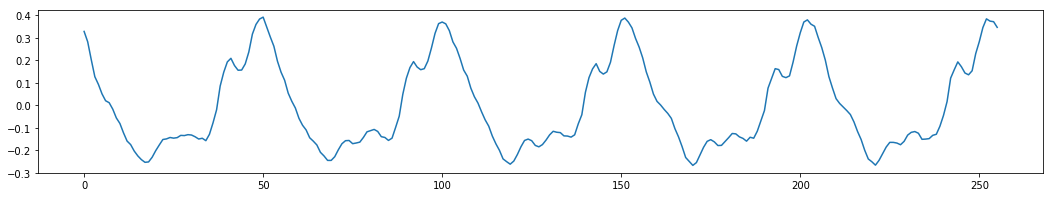

In [225]:
N = 256
chunk = wav[2000:2000+N]
print(len(chunk))

plt.figure(figsize=[18, 3])
plt.plot(chunk)
plt.show()

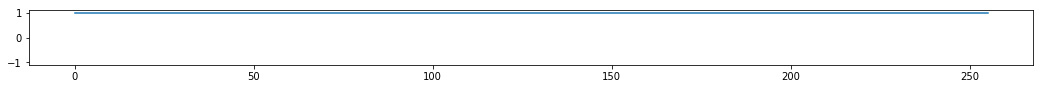

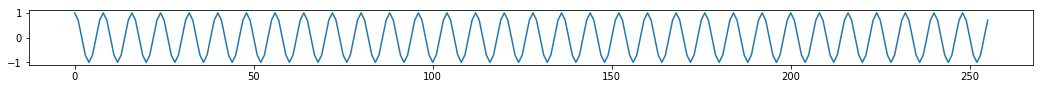

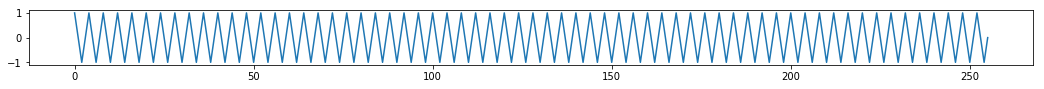

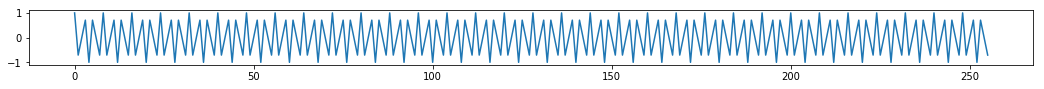

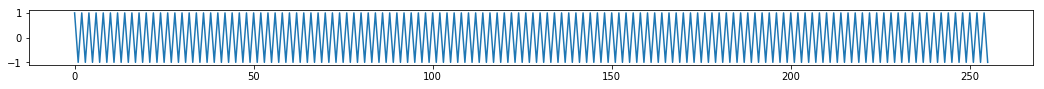

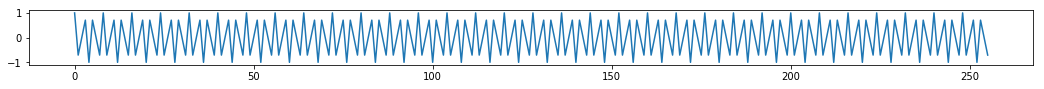

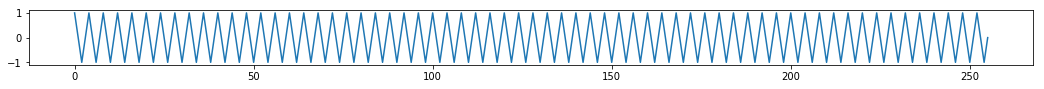

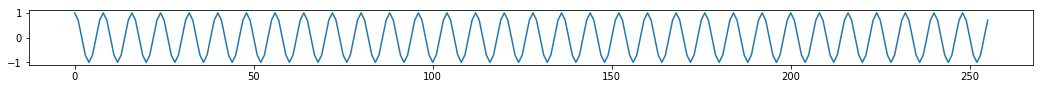

In [226]:
n = np.linspace(0, N-1, N)
for k in range(0, N, 32):
    cos_filter = np.cos(2 * np.pi * k * n / N)

    plt.figure(figsize=[18, 1])
    plt.plot(cos_filter)
    plt.ylim([-1.1, 1.1])
    plt.show()
    

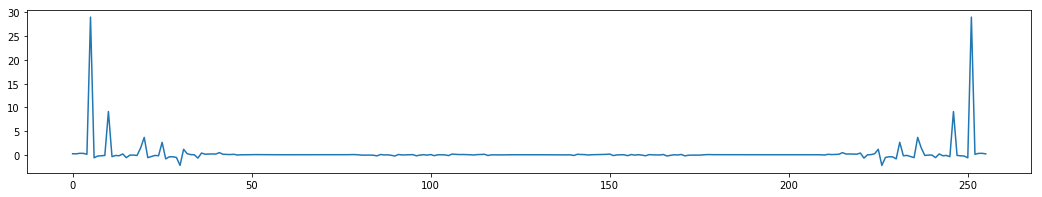

In [227]:
n = np.linspace(0, N-1, N)
cos_coeffs = []
for k in range(0, N):
    cos_filter = np.cos(2 * np.pi * k * n / N)
    coeff = np.sum(chunk * cos_filter)
    cos_coeffs.append(coeff)
cos_coeffs = np.array(cos_coeffs)

plt.figure(figsize=[18, 3])
plt.plot(cos_coeffs)
plt.show()

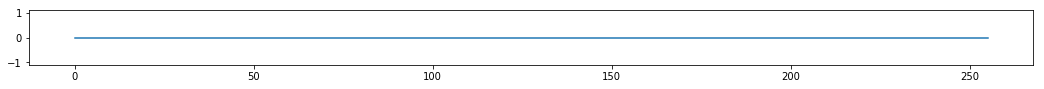

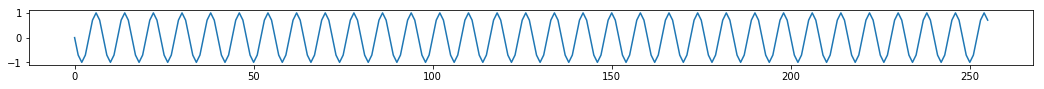

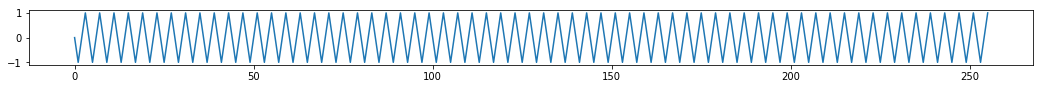

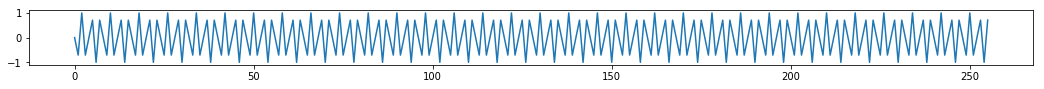

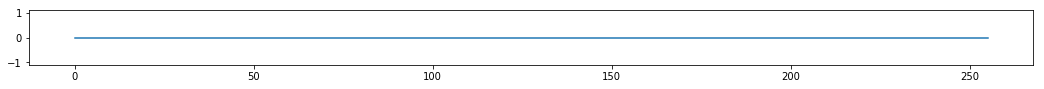

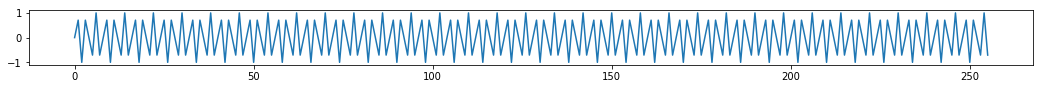

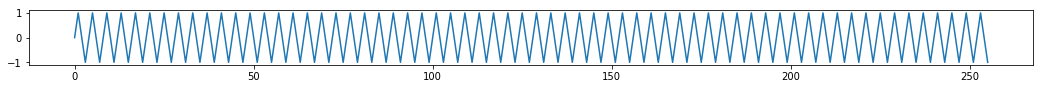

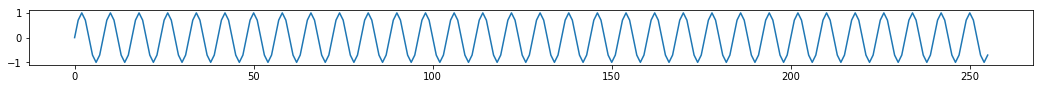

In [228]:
n = np.linspace(0, N-1, N)
for k in range(0, N, 32):
    sin_filter = -np.sin(2 * np.pi * k * n / N)

    plt.figure(figsize=[18, 1])
    plt.plot(sin_filter)
    plt.ylim([-1.1, 1.1])
    plt.show()
    

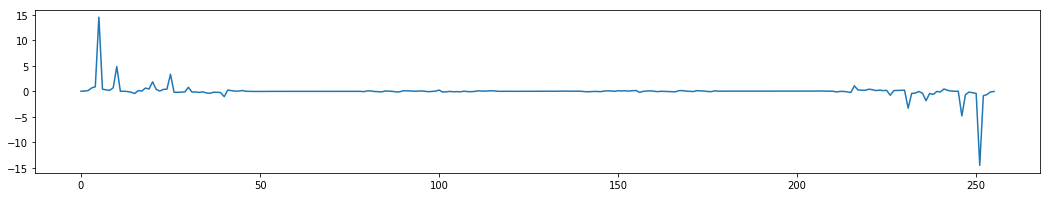

In [229]:
n = np.linspace(0, N-1, N)
sin_coeffs = []
for k in range(0, N):
    cos_filter = -np.sin(2 * np.pi * k * n / N)
    coeff = np.sum(chunk * cos_filter)
    sin_coeffs.append(coeff)
sin_coeffs = np.array(sin_coeffs)

plt.figure(figsize=[18, 3])
plt.plot(sin_coeffs)
plt.show()


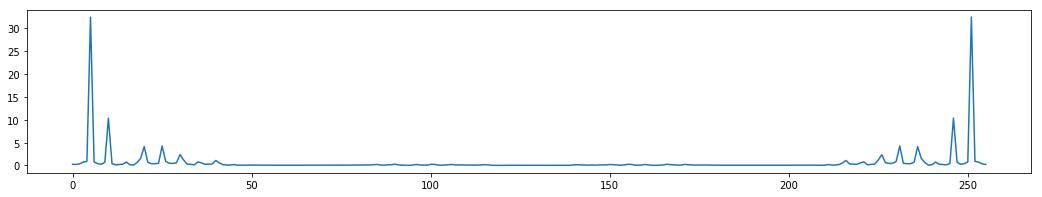

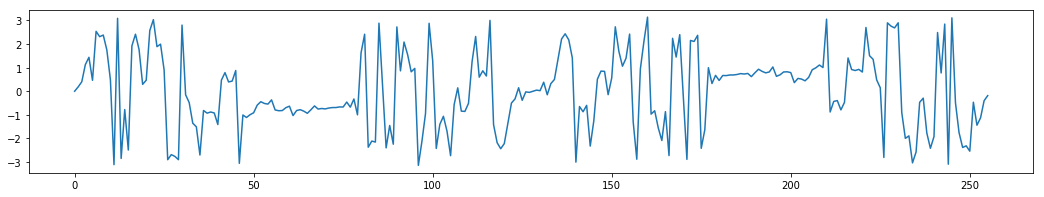

In [230]:
e_coeffs = cos_coeffs + 1j * sin_coeffs
magnitude = np.abs(e_coeffs)
phase = np.angle(e_coeffs)

plt.figure(figsize=[18, 3])
plt.plot(magnitude)
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(phase)
plt.show()


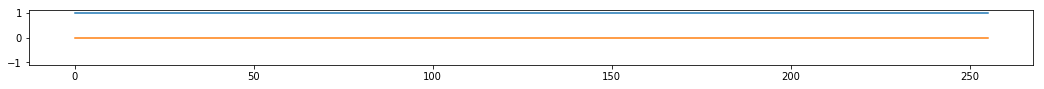

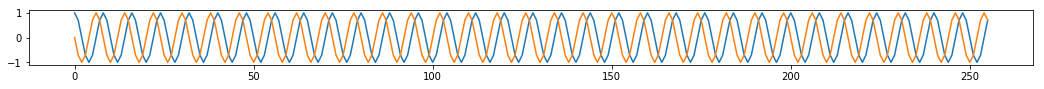

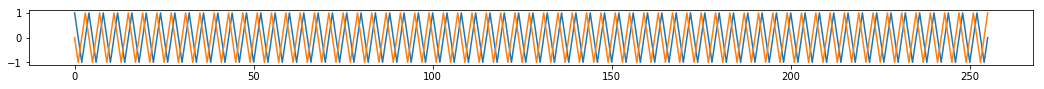

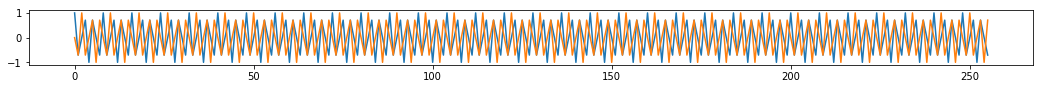

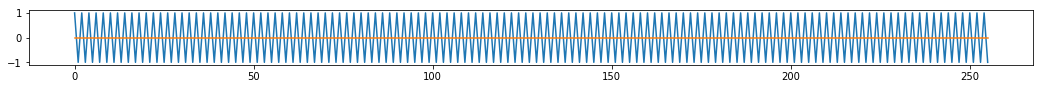

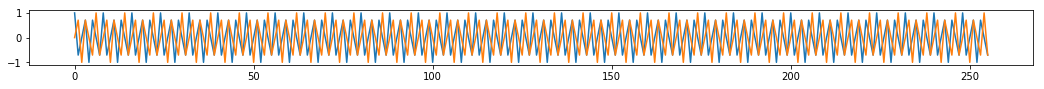

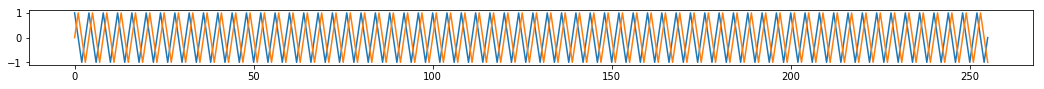

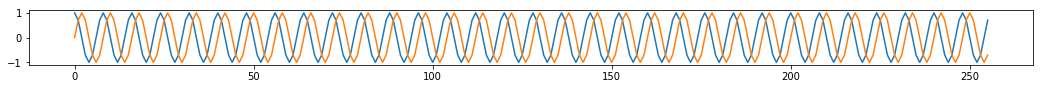

In [231]:
n = np.linspace(0, N-1, N)
for k in range(0, N, 32):
    complex_filter = np.cos(2 * np.pi * k * n / N) - 1j * np.sin(2 * np.pi * k * n / N)

    plt.figure(figsize=[18, 1])
    plt.plot(np.real(complex_filter))
    plt.plot(np.imag(complex_filter))
    plt.ylim([-1.1, 1.1])
    plt.show()
    

DFT Matrix
<img src="dft_matrix.png" width="500">

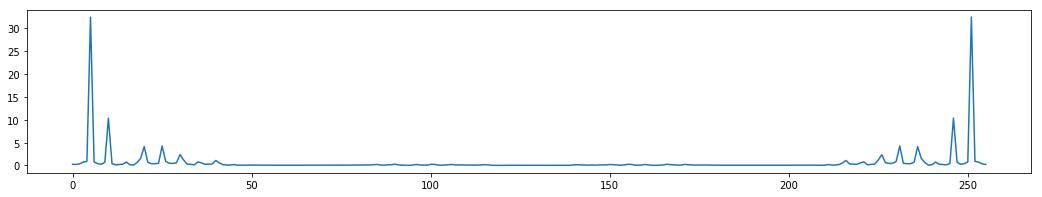

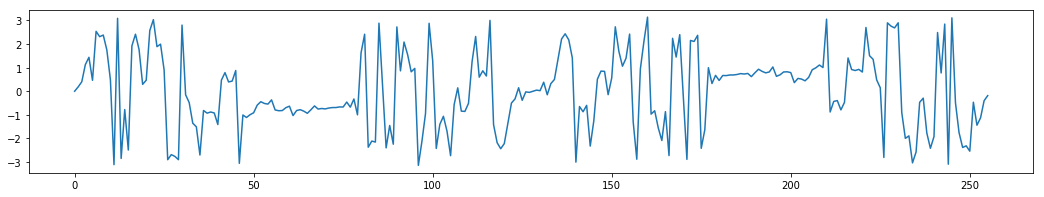

In [232]:
n = np.linspace(0, N-1, N)
complex_coeffs = []
for k in range(0, N):
    complex_filter = np.cos(2 * np.pi * k * n / N) - 1j * np.sin(2 * np.pi * k * n / N)
    coeff = np.sum(chunk * complex_filter)
    complex_coeffs.append(coeff)
complex_coeffs = np.array(complex_coeffs)

plt.figure(figsize=[18, 3])
plt.plot(np.abs(complex_coeffs))
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(np.angle(complex_coeffs))
plt.show()


### without windowing

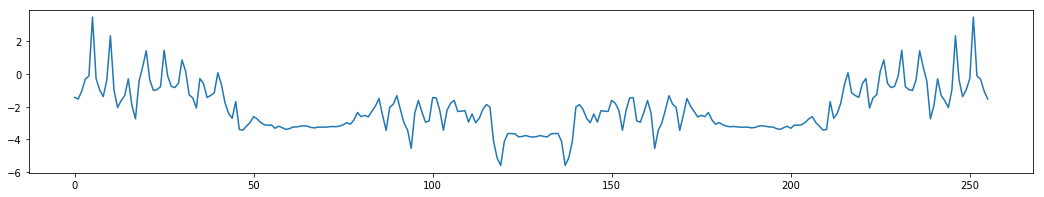

In [233]:
numpy_coeffs = np.fft.fft(chunk)
magnitude = np.abs(numpy_coeffs)
phase = np.angle(numpy_coeffs)

plt.figure(figsize=[18, 3])
plt.plot(np.log(np.maximum(magnitude, 1e-5)))
plt.show()

### with windowing

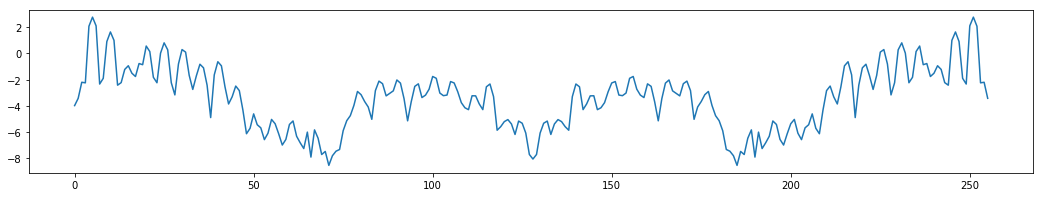

In [234]:
numpy_coeffs = np.fft.fft(chunk * np.hanning(256))
magnitude = np.abs(numpy_coeffs)
phase = np.angle(numpy_coeffs)

plt.figure(figsize=[18, 3])
plt.plot(np.log(np.maximum(magnitude, 1e-5)))
plt.show()

### without windowing

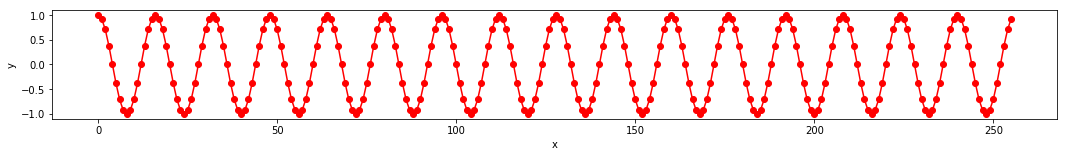

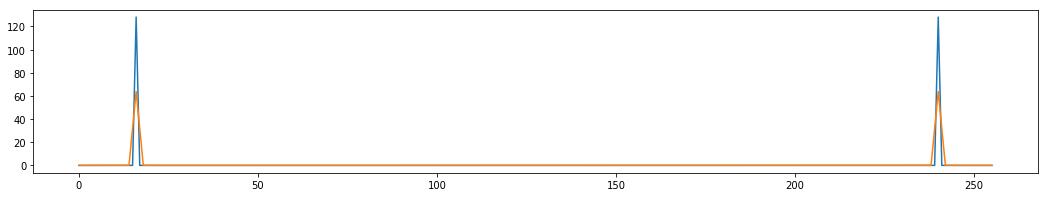

In [235]:
# 구간 길이 지정
N = 256
# 해당 구간 안에서 몇 번 진동이 반복 될지 지정
k = 16
n = np.linspace(0, N-1, N)
y = np.cos(2 * np.pi * k * n / N)

plt.figure(figsize=[18, 2])
plt.plot(n, y, color = 'red', marker = "o") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.show() 

coeffs_not_windowed = np.fft.fft(y)
magnitude_not_windowed = np.abs(coeffs_not_windowed)

coeffs_windowed = np.fft.fft(y * np.hanning(256))
magnitude_windowed = np.abs(coeffs_windowed)

plt.figure(figsize=[18, 3])
plt.plot(magnitude_not_windowed)
plt.plot(magnitude_windowed)
plt.show()


### with windowing

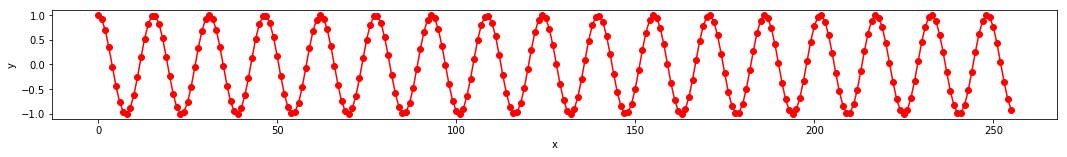

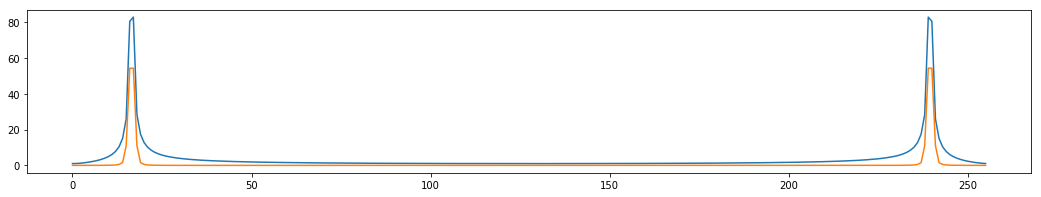

In [236]:
# 구간 길이 지정
N = 256
# 해당 구간 안에서 몇 번 진동이 반복 될지 지정
k = 16.5
n = np.linspace(0, N-1, N) 
y = np.cos(2 * np.pi * k * n / N) 

plt.figure(figsize=[18, 2])
plt.plot(n, y, color = 'red', marker = "o") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.show() 

coeffs_windowed = np.fft.fft(y * np.hanning(256))
magnitude_windowed = np.abs(coeffs_windowed)

coeffs_not_windowed = np.fft.fft(y)
magnitude_not_windowed = np.abs(coeffs_not_windowed)

plt.figure(figsize=[18, 3])
plt.plot(magnitude_not_windowed)
plt.plot(magnitude_windowed)
plt.show()


In [276]:
def get_dft_matrix(N):
    n = np.linspace(0, N-1, N)
    matrix = []
    for k in range(N):
        column = np.cos(2 * np.pi * k * n / N) - 1j * np.sin(2 * np.pi * k * n / N)
        matrix.append(column)
    matrix = np.stack(matrix, axis=0)
    
    return matrix[:int(N/2)+1, :]
    
def stft(wav, n_fft=2048, hop_length=512, window=np.hanning):
    
    dfts = []
    dft_matrix = get_dft_matrix(n_fft)
    
    for start_index in range(0, len(wav), hop_length):
        frame = wav[start_index:start_index+n_fft]
        if len(frame) < n_fft:
            break
        
        frame = frame * window(n_fft)
        dft = dft_matrix @ frame
        dfts.append(dft)
    
    dfts = np.stack(dfts, axis=1)
    
    return dfts
        

In [283]:
spec = np.abs(stft(wav))
print(spec.shape)

(1025, 412)


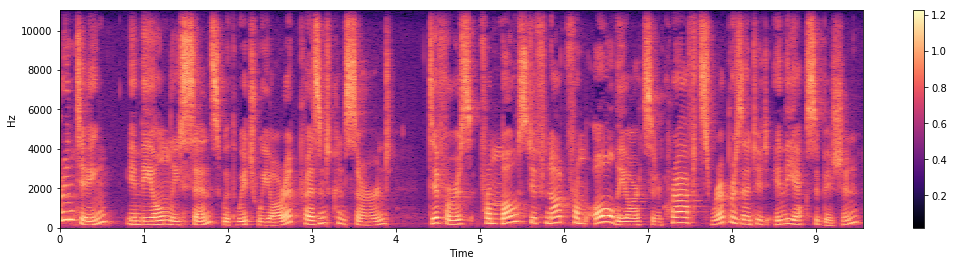

In [284]:
plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(spec), y_axis='linear', x_axis='time')
plt.colorbar()
plt.show()


(80, 1025)


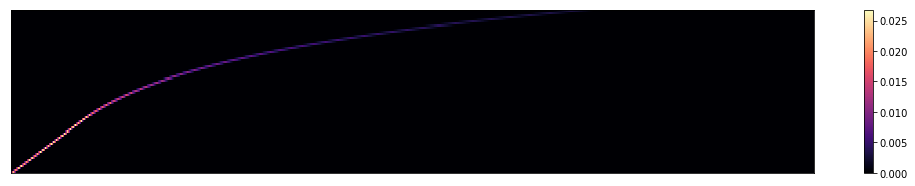

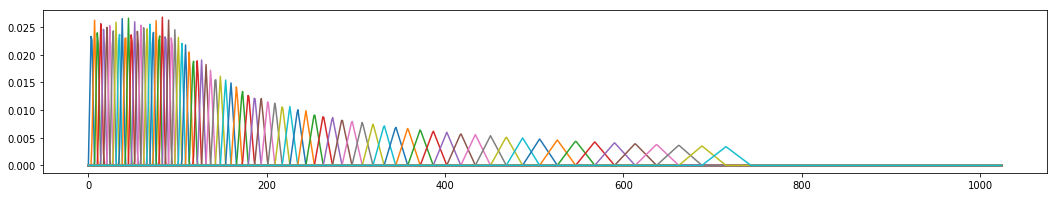

In [285]:
mel_matrix = librosa.filters.mel(sr=22050, n_fft=2048, fmin=0.0, fmax=8000, n_mels=80)
print(mel_matrix.shape)

plt.figure(figsize=[18, 3])
librosa.display.specshow(mel_matrix)
plt.colorbar()
plt.show()

plt.figure(figsize=[18, 3])
for i in range(80):
    plt.plot(mel_matrix[i])
plt.show()

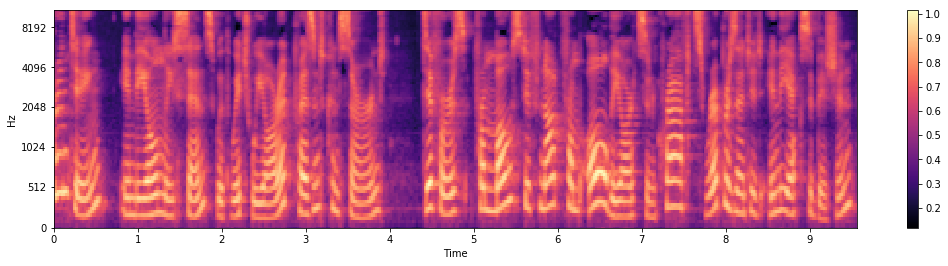

In [286]:
mel = mel_matrix @ spec

plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(mel), y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()